# TiTiler Demo

In [106]:
import httpx
import json
from folium import Map, TileLayer

from matplotlib.pyplot import subplots

In [107]:
endpoint = "https://titiler.xyz"

## Data

In [35]:
dem_path = "https://data.geo.admin.ch/ch.swisstopo.swissalti3d/swissalti3d_2019_2573-1085/swissalti3d_2019_2573-1085_0.5_2056_5728.tif"

rgba_path = "https://noaa-eri-pds.s3.amazonaws.com/2022_Pre_Event/EC2201a_OB_N_RGB/EC2201a_OB_N_C0700000w415145n.tif"

rgbnir_path = "https://njogis-imagery.s3.us-west-2.amazonaws.com/2020/cog/K7A3.tif" 

stac_path = "https://maxar-ard-samples.s3.amazonaws.com/v2/addis-ababa/37/033311333031/2014-01-29/105041001000BD00.json"

### 1 band - DEM

In [109]:
r = httpx.get(
    f"{endpoint}/cog/info",
    params = {
        "url": dem_path
    }
).json()

print(json.dumps(r, indent=4))

{
    "bounds": [
        7.090624928537461,
        45.91605844102821,
        7.1035698381384185,
        45.92509300025415
    ],
    "minzoom": 15,
    "maxzoom": 18,
    "band_metadata": [
        [
            "b1",
            {
                "STATISTICS_COVARIANCES": "10685.98787505646",
                "STATISTICS_EXCLUDEDVALUES": "-9999",
                "STATISTICS_MAXIMUM": "2015.0944824219",
                "STATISTICS_MEAN": "1754.471184271",
                "STATISTICS_MINIMUM": "1615.8128662109",
                "STATISTICS_SKIPFACTORX": "1",
                "STATISTICS_SKIPFACTORY": "1",
                "STATISTICS_STDDEV": "103.37305197708"
            }
        ]
    ],
    "band_descriptions": [
        [
            "b1",
            ""
        ]
    ],
    "dtype": "float32",
    "nodata_type": "Nodata",
    "colorinterp": [
        "gray"
    ],
    "driver": "GTiff",
    "count": 1,
    "overviews": [
        2,
        4,
        8
    ],
    "width": 2000,
 

In [110]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = {
        "url": dem_path,

    }
).json()
print(r)


m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="swisstopo"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fdata.geo.admin.ch%2Fch.swisstopo.swissalti3d%2Fswissalti3d_2019_2573-1085%2Fswissalti3d_2019_2573-1085_0.5_2056_5728.tif'], 'minzoom': 15, 'maxzoom': 18, 'bounds': [7.090624928537461, 45.91605844102821, 7.1035698381384185, 45.92509300025415], 'center': [7.09709738333794, 45.92057572064118, 15]}


In [111]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = {
        "url": dem_path,
        "rescale": "1600,2000",
        "colormap_name": "terrain"

    }
).json()
print(r)


m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="swisstopo"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fdata.geo.admin.ch%2Fch.swisstopo.swissalti3d%2Fswissalti3d_2019_2573-1085%2Fswissalti3d_2019_2573-1085_0.5_2056_5728.tif&rescale=1600%2C2000&colormap_name=terrain'], 'minzoom': 15, 'maxzoom': 18, 'bounds': [7.090624928537461, 45.91605844102821, 7.1035698381384185, 45.92509300025415], 'center': [7.09709738333794, 45.92057572064118, 15]}


In [112]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = {
        "url": dem_path,
        "algorithm": "hillshade",
        "buffer": 3

    }
).json()
print(r)


m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="swisstopo"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fdata.geo.admin.ch%2Fch.swisstopo.swissalti3d%2Fswissalti3d_2019_2573-1085%2Fswissalti3d_2019_2573-1085_0.5_2056_5728.tif&algorithm=hillshade&buffer=3'], 'minzoom': 15, 'maxzoom': 18, 'bounds': [7.090624928537461, 45.91605844102821, 7.1035698381384185, 45.92509300025415], 'center': [7.09709738333794, 45.92057572064118, 15]}


### 3 bands - RGB + alpha

In [91]:
r = httpx.get(
    f"{endpoint}/cog/info",
    params = {
        "url": rgba_path
    }
).json()

print(json.dumps(r, indent=4))

{
    "bounds": [
        -70.0001,
        41.8499,
        -69.9874,
        41.8626
    ],
    "minzoom": 15,
    "maxzoom": 19,
    "band_metadata": [
        [
            "b1",
            {}
        ],
        [
            "b2",
            {}
        ],
        [
            "b3",
            {}
        ],
        [
            "b4",
            {}
        ]
    ],
    "band_descriptions": [
        [
            "b1",
            ""
        ],
        [
            "b2",
            ""
        ],
        [
            "b3",
            ""
        ],
        [
            "b4",
            ""
        ]
    ],
    "dtype": "uint8",
    "nodata_type": "Alpha",
    "colorinterp": [
        "red",
        "green",
        "blue",
        "alpha"
    ],
    "height": 4707,
    "width": 4707,
    "count": 4,
    "driver": "GTiff",
    "overviews": [
        2,
        4,
        8,
        16
    ]
}


In [92]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = {
        "url": rgba_path,
    }
).json()
print(r)

m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="noaa-eri"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fnoaa-eri-pds.s3.amazonaws.com%2F2022_Pre_Event%2FEC2201a_OB_N_RGB%2FEC2201a_OB_N_C0700000w415145n.tif'], 'minzoom': 15, 'maxzoom': 19, 'bounds': [-70.0001, 41.8499, -69.9874, 41.8626], 'center': [-69.99375, 41.85625, 15]}


{'b1': {'min': 3.0, 'max': 255.0, 'mean': 44.28088569641113, 'count': 1048576.0, 'sum': 46431874.0, 'std': 21.478155410455006, 'median': 41.0, 'majority': 35.0, 'minority': 219.0, 'unique': 233.0, 'histogram': [[218960.0, 576316.0, 183104.0, 47153.0, 15985.0, 4491.0, 1574.0, 861.0, 124.0, 8.0], [3.0, 28.2, 53.4, 78.6, 103.8, 129.0, 154.2, 179.4, 204.6, 229.79999999999998, 255.0]], 'valid_percent': 100.0, 'masked_pixels': 0.0, 'valid_pixels': 1048576.0, 'percentile_2': 14.0, 'percentile_98': 106.0}, 'b2': {'min': 5.0, 'max': 255.0, 'mean': 41.057403564453125, 'count': 1048576.0, 'sum': 43051808.0, 'std': 19.3989667942912, 'median': 38.0, 'majority': 35.0, 'minority': 215.0, 'unique': 230.0, 'histogram': [[274549.0, 608506.0, 116047.0, 35931.0, 8780.0, 2625.0, 1426.0, 598.0, 107.0, 7.0], [5.0, 30.0, 55.0, 80.0, 105.0, 130.0, 155.0, 180.0, 205.0, 230.0, 255.0]], 'valid_percent': 100.0, 'masked_pixels': 0.0, 'valid_pixels': 1048576.0, 'percentile_2': 14.0, 'percentile_98': 96.0}, 'b3': {'m

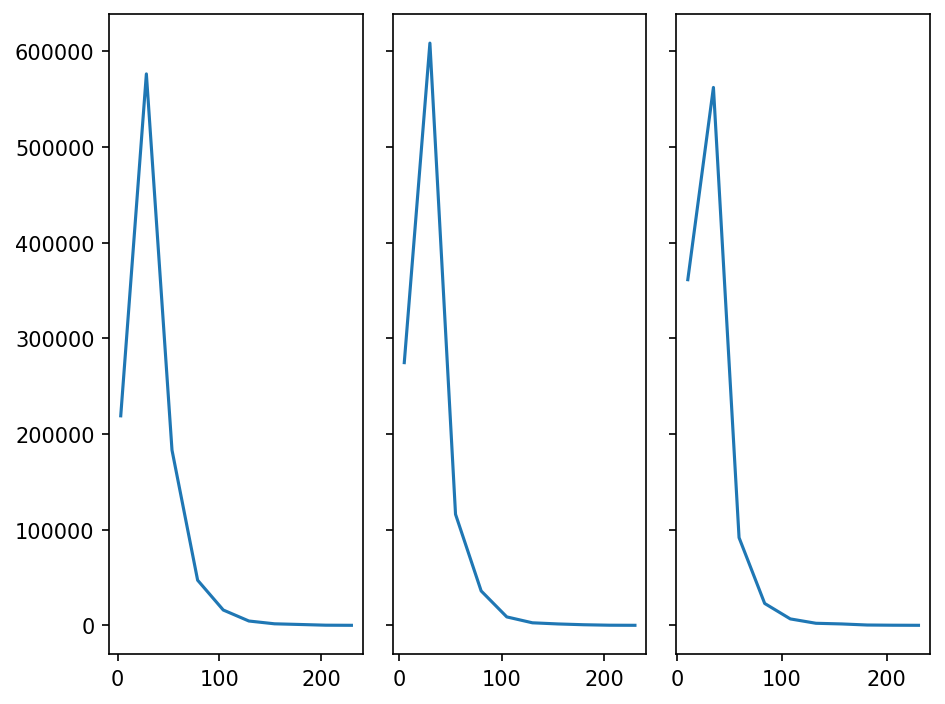

In [93]:
meta = httpx.get(
    f"{endpoint}/cog/statistics",
    params = {
        "url": rgba_path
    }
).json()
print(meta)
    
fig, axs = subplots(1, 3, sharey=True, tight_layout=True, dpi=150)

# Red (index 1)
axs[0].plot(meta["b1"]["histogram"][1][0:-1], meta["b1"]["histogram"][0])

# Green (index 2)
axs[1].plot(meta["b2"]["histogram"][1][0:-1], meta["b2"]["histogram"][0])

# Blue (index 3)
axs[2].plot(meta["b3"]["histogram"][1][0:-1], meta["b3"]["histogram"][0])

### 4 bands - RGB + Nir

In [113]:
r = httpx.get(
    f"{endpoint}/cog/info",
    params = {
        "url": rgbnir_path
    }
).json()

print(json.dumps(r, indent=4))

{
    "bounds": [
        -74.11091849437823,
        40.69954173337543,
        -74.09280142563541,
        40.713328767614236
    ],
    "minzoom": 14,
    "maxzoom": 19,
    "band_metadata": [
        [
            "b1",
            {}
        ],
        [
            "b2",
            {}
        ],
        [
            "b3",
            {}
        ],
        [
            "b4",
            {}
        ]
    ],
    "band_descriptions": [
        [
            "b1",
            ""
        ],
        [
            "b2",
            ""
        ],
        [
            "b3",
            ""
        ],
        [
            "b4",
            ""
        ]
    ],
    "dtype": "uint16",
    "nodata_type": "None",
    "colorinterp": [
        "red",
        "green",
        "blue",
        "undefined"
    ],
    "height": 5000,
    "width": 5000,
    "count": 4,
    "overviews": [
        2,
        4,
        8,
        16
    ],
    "driver": "GTiff"
}


{'b1': {'min': 545.0, 'max': 65535.0, 'mean': 20660.144067764282, 'count': 1048576.0, 'sum': 21663731226.0, 'std': 11006.10071993407, 'median': 16881.0, 'majority': 65535.0, 'minority': 545.0, 'unique': 57690.0, 'histogram': [[32667.0, 323087.0, 249671.0, 187506.0, 124373.0, 55474.0, 37423.0, 20222.0, 7008.0, 11145.0], [545.0, 7044.0, 13543.0, 20042.0, 26541.0, 33040.0, 39539.0, 46038.0, 52537.0, 59036.0, 65535.0]], 'valid_percent': 100.0, 'masked_pixels': 0.0, 'valid_pixels': 1048576.0, 'percentile_98': 51173.0, 'percentile_2': 5986.0}, 'b2': {'min': 4901.0, 'max': 65535.0, 'mean': 24491.405985832214, 'count': 1048576.0, 'sum': 25681100523.0, 'std': 9912.035488072834, 'median': 20985.0, 'majority': 65535.0, 'minority': 4901.0, 'unique': 54315.0, 'histogram': [[21829.0, 116681.0, 453373.0, 198199.0, 127940.0, 55158.0, 32940.0, 21485.0, 9027.0, 11944.0], [4901.0, 10964.4, 17027.8, 23091.199999999997, 29154.6, 35218.0, 41281.399999999994, 47344.799999999996, 53408.2, 59471.6, 65535.0]], 

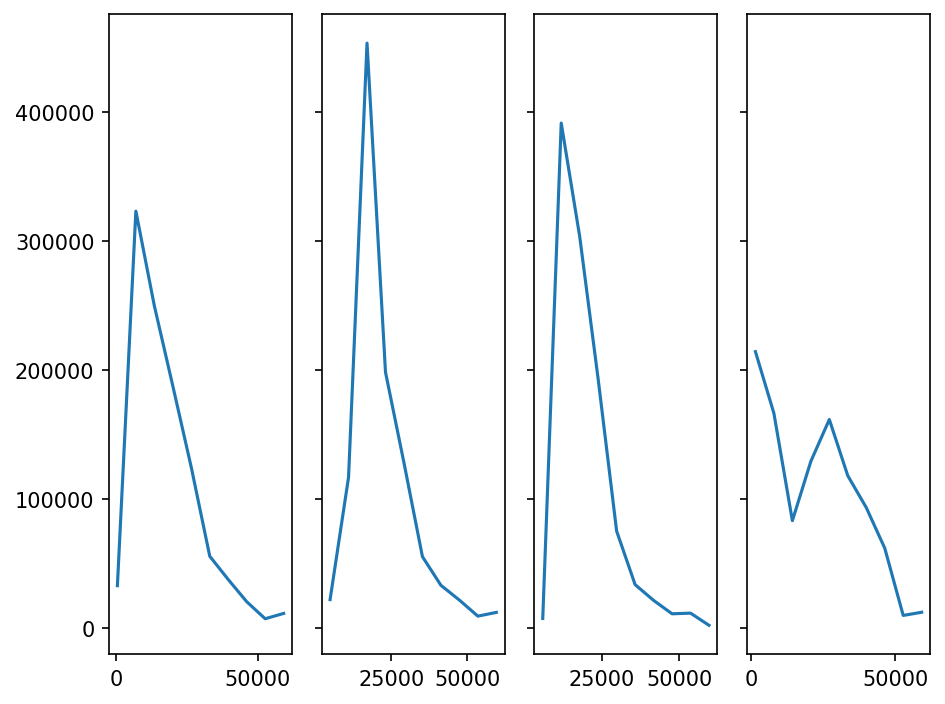

In [114]:
meta = httpx.get(
    f"{endpoint}/cog/statistics",
    params = {
        "url": rgbnir_path
    }
).json()
print(meta)
    
fig, axs = subplots(1, 4, sharey=True, tight_layout=True, dpi=150)

# Red (index 1)
axs[0].plot(meta["b1"]["histogram"][1][0:-1], meta["b1"]["histogram"][0])

# Green (index 2)
axs[1].plot(meta["b2"]["histogram"][1][0:-1], meta["b2"]["histogram"][0])

# Blue (index 3)
axs[2].plot(meta["b3"]["histogram"][1][0:-1], meta["b3"]["histogram"][0])

# Nir (index 3)
axs[3].plot(meta["b4"]["histogram"][1][0:-1], meta["b4"]["histogram"][0])

In [115]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = (
        ("url", rgbnir_path),
        ("bidx", 1),
        ("bidx", 2),
        ("bidx", 3),
    )
).json()
print(r)
m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="njogis"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fnjogis-imagery.s3.us-west-2.amazonaws.com%2F2020%2Fcog%2FK7A3.tif&bidx=1&bidx=2&bidx=3'], 'minzoom': 14, 'maxzoom': 19, 'bounds': [-74.11091849437823, 40.69954173337543, -74.09280142563541, 40.713328767614236], 'center': [-74.10185996000682, 40.706435250494835, 14]}


In [116]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = (
        ("url", rgbnir_path),
        ("bidx", 4),
        ("bidx", 1),
        ("bidx", 2),
    )
).json()
print(r)

m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="njogis"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fnjogis-imagery.s3.us-west-2.amazonaws.com%2F2020%2Fcog%2FK7A3.tif&bidx=4&bidx=1&bidx=2'], 'minzoom': 14, 'maxzoom': 19, 'bounds': [-74.11091849437823, 40.69954173337543, -74.09280142563541, 40.713328767614236], 'center': [-74.10185996000682, 40.706435250494835, 14]}


In [117]:
r = httpx.get(
    f"{endpoint}/cog/tilejson.json",
    params = (
        ("url", rgbnir_path),
        ("expression", "(b4-b1)/(b4+b1)"),  # NDVI
        ("rescale", "-1,1"),  # Ratio values should be between -1 and +1
        ("colormap_name", "viridis"),
    )
).json()
print(r)

m = Map(
    location=(r["center"][1], r["center"][0]),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="njogis"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fnjogis-imagery.s3.us-west-2.amazonaws.com%2F2020%2Fcog%2FK7A3.tif&expression=%28b4-b1%29%2F%28b4%2Bb1%29&rescale=-1%2C1&colormap_name=viridis'], 'minzoom': 14, 'maxzoom': 19, 'bounds': [-74.11091849437823, 40.69954173337543, -74.09280142563541, 40.713328767614236], 'center': [-74.10185996000682, 40.706435250494835, 14]}


## STAC support

In [118]:
r = httpx.get(
    f"{endpoint}/stac/assets",
    params = {
        "url": stac_path
    }
).json()

print(json.dumps(r, indent=4))

[
    "visual",
    "pan",
    "ms"
]


In [100]:
info = httpx.get(
    f"{endpoint}/stac/info",
    params = {
        "url": stac_path
    }
).json()

print(json.dumps(info, indent=4))

{
    "visual": {
        "bounds": [
            38.77115511410053,
            8.909402280786303,
            38.81950605991044,
            8.957480838823233
        ],
        "minzoom": 12,
        "maxzoom": 19,
        "band_metadata": [
            [
                "b1",
                {}
            ],
            [
                "b2",
                {}
            ],
            [
                "b3",
                {}
            ]
        ],
        "band_descriptions": [
            [
                "b1",
                ""
            ],
            [
                "b2",
                ""
            ],
            [
                "b3",
                ""
            ]
        ],
        "dtype": "uint8",
        "nodata_type": "Mask",
        "colorinterp": [
            "red",
            "green",
            "blue"
        ],
        "driver": "GTiff",
        "height": 17408,
        "width": 17408,
        "overviews": [
            2,
            4,
   

In [79]:
visual_info = info["visual"]
bounds = visual_info["bounds"]

r = httpx.get(
    f"{endpoint}/stac/tilejson.json",
    params = (
        ("url", stac_path),
        ("assets", "visual"),
        ("minzoom", visual_info["minzoom"]),
        ("maxzoom", visual_info["maxzoom"]),
    )
).json()
print(r)

m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=r["minzoom"]
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="Maxar"
)
aod_layer.add_to(m)
m

{'tilejson': '2.2.0', 'version': '1.0.0', 'scheme': 'xyz', 'tiles': ['https://titiler.xyz/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fmaxar-ard-samples.s3.amazonaws.com%2Fv2%2Faddis-ababa%2F37%2F033311333031%2F2014-01-29%2F105041001000BD00.json&assets=visual'], 'minzoom': 12, 'maxzoom': 19, 'bounds': [38.771185084350314, 8.909402280786303, 38.81948241866229, 8.957480838823232], 'center': [38.795333751506305, 8.933441559804766, 12]}


## Multiple Projection

In [103]:
import json

import httpx

from ipyleaflet import (
    Map,
    basemaps,
    basemap_to_tiles,
    TileLayer,
    WMSLayer,
    GeoJSON,
    projections
)


r = httpx.get(f"{endpoint}/tileMatrixSets").json()

print("Supported TMS:")
for tms in r["tileMatrixSets"]:
    print("-", tms["id"])

Supported TMS:
- CanadianNAD83_LCC
- EuropeanETRS89_LAEAQuad
- LINZAntarticaMapTilegrid
- NZTM2000
- NZTM2000Quad
- UPSAntarcticWGS84Quad
- UPSArcticWGS84Quad
- UTM31WGS84Quad
- WGS1984Quad
- WebMercatorQuad
- WorldCRS84Quad
- WorldMercatorWGS84Quad


In [104]:
url = "https://s3.amazonaws.com/opendata.remotepixel.ca/cogs/natural_earth/world.tif" # Natural Earth WORLD tif


r = httpx.get(
    f"{endpoint}/cog/WorldCRS84Quad/tilejson.json", params = {"url": url}
).json()

m = Map(center=(0, 0), zoom=1, basemap={}, crs=projections.EPSG4326)

layer = TileLayer(url=r["tiles"][0], opacity=1)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [105]:
url = "https://s3.amazonaws.com/opendata.remotepixel.ca/cogs/natural_earth/world.tif" # Natural Earth WORLD tif

r = httpx.get(
    f"{endpoint}/cog/EuropeanETRS89_LAEAQuad/tilejson.json", params = {"url": url}
).json()

my_projection = {
    'name': 'EPSG:3035',
    'custom': True, #This is important, it tells ipyleaflet that this projection is not on the predefined ones.
    'proj4def': '+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs',
    'origin': [6500000.0, 5500000.0],
    'resolutions': [
        8192.0,
        4096.0,
        2048.0,
        1024.0,
        512.0,
        256.0
    ]
}

m = Map(center=(50, 65), zoom=0, basemap={}, crs=my_projection)

layer = TileLayer(url=r["tiles"][0], opacity=1)
m.add_layer(layer)
m

Map(center=[50, 65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…